In [1]:

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import scipy.stats as st
import pylab
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df=pd.read_csv("C:\\Users\\md kaif\\Downloads\\machine_learning_dataset-20230125T051028Z-001\\machine_learning_dataset\\vehicle_data.csv")

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df["Owner"].unique()

array([0, 1, 3], dtype=int64)

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

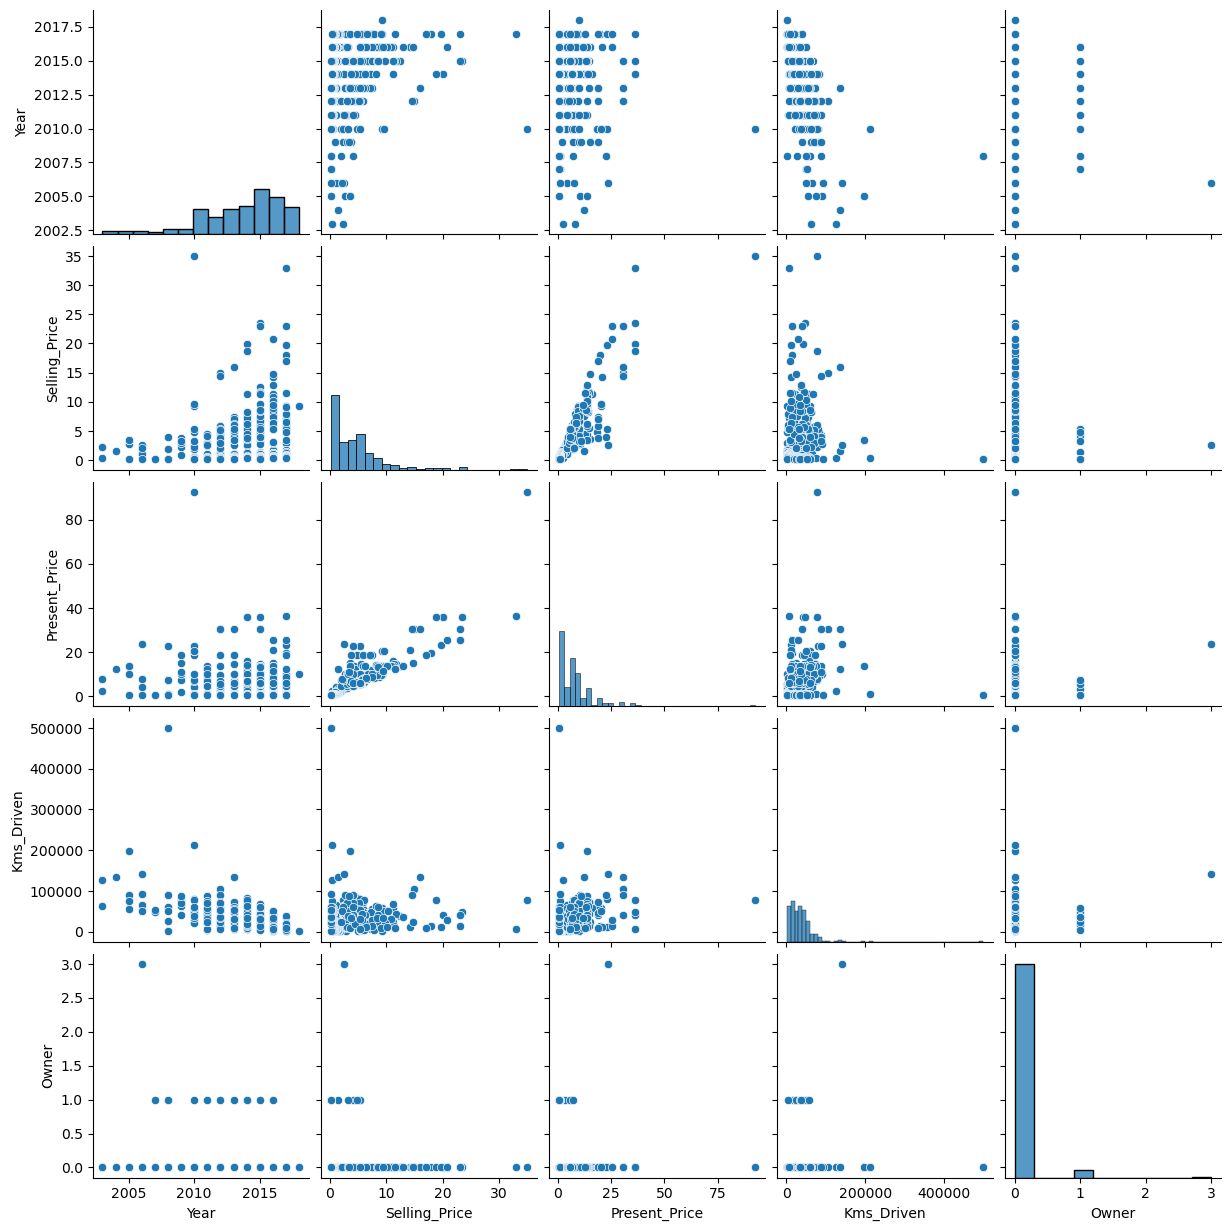

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [11]:
numeric=int,float
df_numeric=df.select_dtypes(include=numeric)
print(df_numeric)

     Year  Selling_Price  Present_Price  Kms_Driven  Owner
0    2014           3.35          5.590       27000      0
1    2013           4.75          9.540       43000      0
2    2017           7.25          9.850        6900      0
3    2011           2.85          4.150        5200      0
4    2014           4.60          6.870       42450      0
5    2018           9.25          9.830        2071      0
6    2015           6.75          8.120       18796      0
7    2015           6.50          8.610       33429      0
8    2016           8.75          8.890       20273      0
9    2015           7.45          8.920       42367      0
10   2017           2.85          3.600        2135      0
11   2015           6.85         10.380       51000      0
12   2015           7.50          9.940       15000      0
13   2015           6.10          7.710       26000      0
14   2009           2.25          7.210       77427      0
15   2016           7.75         10.790       43000     

C:\Users\md kaif\AppData\Local\Temp\ipykernel_10532\239639491.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_numeric[i])
C:\Users\md kaif\AppData\Local\Temp\ipykernel_10532\239639491.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_numeric[i])
C:\Users\md kaif\AppData\Local\Temp\ip

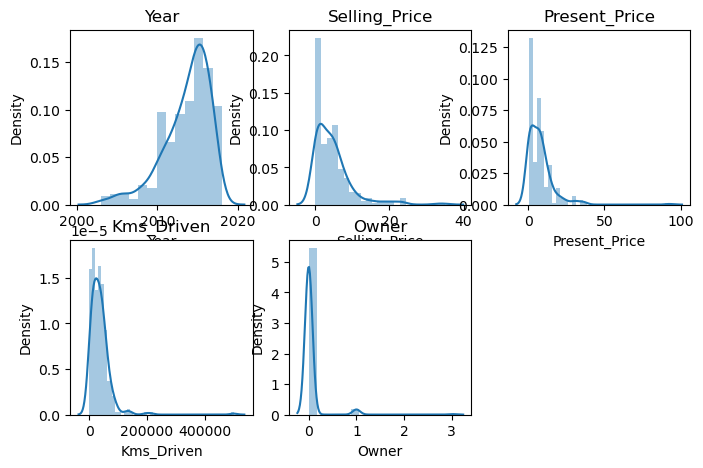

In [12]:
pos=1
plt.figure(figsize=(8,5))
for i in df_numeric:
    plt.subplot(2,3,pos)
    sns.distplot(df_numeric[i])
    plt.title(i)
    pos+=1

In [13]:
df.skew()

C:\Users\md kaif\AppData\Local\Temp\ipykernel_10532\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Year            -1.246189
Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
dtype: float64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


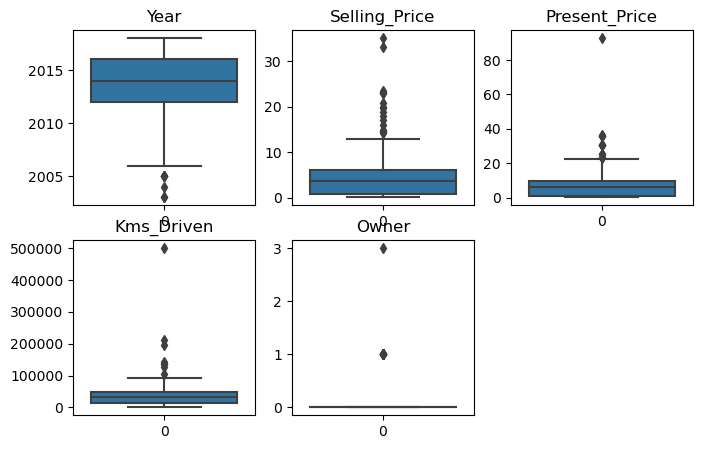

In [15]:
pos=1
plt.figure(figsize=(8,5))
for i in df_numeric:
    plt.subplot(2,3,pos)
    sns.boxplot(df_numeric[i])
    plt.title(i)
    pos+=1

## Feature Engineering

In [16]:
df["age"]=2023-df["Year"]
df.drop(columns=["Year"],inplace=True)

In [17]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [18]:
for i in df.select_dtypes(include="object").columns:
    print(i,"_*_*_*_*_",df[i].unique(),"_______",df[i].unique())

Car_Name _*_*_*_*_ ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Stree

## One Hot Encoding

In [19]:
df1=pd.get_dummies(df,columns=["Fuel_Type","Seller_Type","Transmission"],drop_first=True)

In [20]:
df1.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,9,0,1,0,1
1,sx4,4.75,9.54,43000,0,10,1,0,0,1
2,ciaz,7.25,9.85,6900,0,6,0,1,0,1
3,wagon r,2.85,4.15,5200,0,12,0,1,0,1
4,swift,4.60,6.87,42450,0,9,1,0,0,1


In [21]:
df1.shape

(301, 10)

#### We cannot Apply One -Hot Encoding Here On The Car_Columns Because Dimensionality would Increase

In [22]:
df2=df1.groupby(["Car_Name"])["Selling_Price"].agg(["mean"]).reset_index()

In [23]:
df2

,Car_Name,mean
0,800,0.350000
1,Activa 3g,0.310000
2,Activa 4g,0.400000
3,Bajaj ct 100,0.180000
4,Bajaj Avenger 150,0.750000
5,Bajaj Avenger 150 street,0.600000
6,Bajaj Avenger 220,0.790000
7,Bajaj Avenger 220 dtsi,0.525000
8,Bajaj Avenger Street 220,0.450000
9,Bajaj Discover 100,0.270000


In [24]:
l=[]
for i in df1["Car_Name"]:
    for j,k in df2.iterrows():
        if i==k["Car_Name"]:
            l.append(k["mean"])
df1["Car_Name"]=l

## Segregate X and y

In [25]:
x=df1.drop(columns=["Selling_Price"])
y=df1["Selling_Price"]

In [26]:
st=StandardScaler()
x_scaled=(st.fit_transform(x))

In [27]:
## Checking MultiCollinearity == V.I.F
vif = pd.DataFrame()  ##creating blank dataframe 
#vif
variables  = x_scaled
#variables.shape
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
#vif["VIF"]
vif["features"]=x.columns
#vif["features"]
vif

,VIF,features
0,8.758764,Car_Name
1,7.061929,Present_Price
2,1.518395,Kms_Driven
3,1.101995,Owner
4,1.485490,age
5,25.828389,Fuel_Type_Diesel
6,25.187499,Fuel_Type_Petrol
7,1.638701,Seller_Type_Individual
8,1.199609,Transmission_Manual


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=1)

In [29]:
print(x_train.shape)
print(y_train.shape)

(240, 9)
(240,)


In [30]:
print(x_test.shape)
print(y_test.shape)

(61, 9)
(61,)


In [31]:
lr=LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_train_pred=lr.predict(x_train)
r2_score(y_train,y_train_pred)

0.8915572561110516

In [34]:
y_pred=lr.predict(x_test)

In [35]:
r2_score(y_test,y_pred)

0.9035789494878799

## Applying Cross Validation

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [37]:
lr=LinearRegression()

In [38]:
cv=KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(lr,x_scaled,y,scoring="r2",cv=cv,n_jobs=-1)
np.mean(scores)

0.857859947629195